<a href="https://colab.research.google.com/github/PhamTienLoc/Lab_DM/blob/main/Lab_3_21130429_PhamTienLoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DM Lab 3: Association Rules - Apriori using **efficient-apriori** api
# 21130429 - Phạm Tiến Lộc


---



# Import libraries

In [8]:
!pip install efficient-apriori

In [9]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from efficient_apriori import apriori

In [11]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/data'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/data


#Task 1. Apply Apriori algorithm to **dataset1** with 5 transactions from a set of items {Bread, Milk, Diaper, Beer, Coke}

#Task 1.1. Prepare dataset (load transactions from dataset1.csv and preprocess them)

In [27]:
#code
ds1 = pd.read_csv('dataset1.csv')
transactions = [transaction.replace(',', '').split() for transaction in ds1['Items']]
print(transactions)

[['Bread', 'Milk'], ['Bread', 'Diaper', 'Beer', 'Eggs'], ['Milk', 'Diaper', 'Beer', 'Coke'], ['Bread', 'Milk', 'Diaper', 'Beer'], ['Bread', 'Milk', 'Diaper', 'Coke']]


#Task 1.2. Apply Apriori to the preprocessed dataset with min_supp = 50% and min_conf = 50%

In [31]:
#code
itemsets, rules = apriori(transactions, min_support=0.5, min_confidence=0.5)
print(rules)
print(itemsets)

[{Diaper} -> {Beer}, {Beer} -> {Diaper}, {Diaper} -> {Bread}, {Bread} -> {Diaper}, {Milk} -> {Bread}, {Bread} -> {Milk}, {Milk} -> {Diaper}, {Diaper} -> {Milk}]
{1: {('Bread',): 4, ('Milk',): 4, ('Diaper',): 4, ('Beer',): 3}, 2: {('Beer', 'Diaper'): 3, ('Bread', 'Diaper'): 3, ('Bread', 'Milk'): 3, ('Diaper', 'Milk'): 3}}


#Task 1.3. Report association rules obtained from Task 1.2 (include their support, confidence, and lift)

In [41]:
#code
rules_rhs = filter(lambda rule: len(rule.lhs) == 1 and len(rule.rhs) == 1, rules)
for rule in sorted(rules_rhs, key=lambda rule: rule.lift):
  print(rule)

{Diaper} -> {Bread} (conf: 0.750, supp: 0.600, lift: 0.938, conv: 0.800)
{Bread} -> {Diaper} (conf: 0.750, supp: 0.600, lift: 0.938, conv: 0.800)
{Milk} -> {Bread} (conf: 0.750, supp: 0.600, lift: 0.938, conv: 0.800)
{Bread} -> {Milk} (conf: 0.750, supp: 0.600, lift: 0.938, conv: 0.800)
{Milk} -> {Diaper} (conf: 0.750, supp: 0.600, lift: 0.938, conv: 0.800)
{Diaper} -> {Milk} (conf: 0.750, supp: 0.600, lift: 0.938, conv: 0.800)
{Diaper} -> {Beer} (conf: 0.750, supp: 0.600, lift: 1.250, conv: 1.600)
{Beer} -> {Diaper} (conf: 1.000, supp: 0.600, lift: 1.250, conv: 200000000.000)


#Task 2. Apply Apriori algorithm to **dataset2** with transactions from a set of 20 items

#Task 2.1. Prepare dataset (load transactions from dataset2.csv and preprocess them)

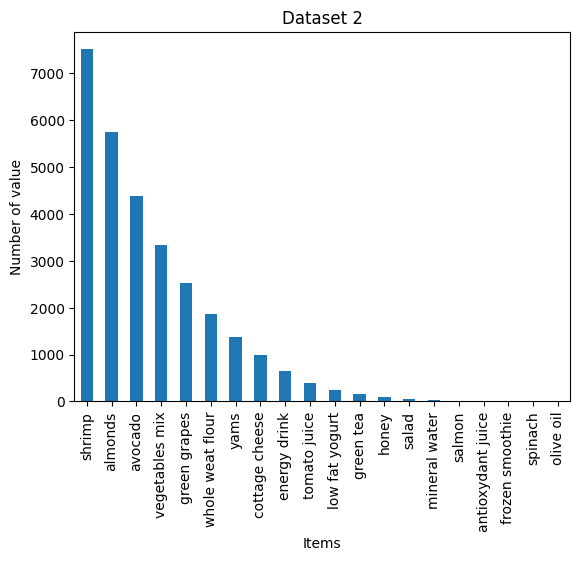

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice
0,burgers,meatballs,eggs,mineral water,green tea,french fries,green tea,green tea,green tea,green tea
1,chutney,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea
2,turkey,avocado,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea
3,mineral water,milk,energy bar,whole wheat rice,green tea,french fries,green tea,green tea,green tea,green tea
4,low fat yogurt,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea
...,...,...,...,...,...,...,...,...,...,...
7495,butter,light mayo,fresh bread,mineral water,green tea,french fries,green tea,green tea,green tea,green tea
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,green tea,green tea,green tea,green tea
7497,chicken,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea
7498,escalope,green tea,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea


In [48]:
#code
ds2 = pd.read_csv('dataset2.csv')
ds2.count().plot(kind='bar')
plt.title('Dataset 2')
plt.xlabel("Items")
plt.ylabel("Number of value")
plt.show()
ds2.drop(ds2.iloc[:, 10:20], inplace=True, axis=1)
for column in ds2.columns:
  ds2.fillna({column: ds2[column].mode()[0]}, inplace=True)
ds2

#Task 2.2. Apply Apriori to the preprocessed dataset with min_supp = 50% and min_conf = 50% (*modify min_supp and min_conf if proposed values are not appropriate*)

In [56]:
#code
transactions = []



[{a} -> { }, { } -> {a}, {e} -> { }, { } -> {e}, {e} -> {a}, {a} -> {e}, {o} -> {a}, {a} -> {o}, {s} -> {a}, {a} -> {s}, {a, e} -> { }, { , e} -> {a}, { , a} -> {e}, {e} -> { , a}, {a} -> { , e}, { } -> {a, e}]
{1: {('s',): 6, ('m',): 5, ('a',): 8, ('o',): 5, ('e',): 6, (' ',): 6}, 2: {(' ', 'a'): 5, (' ', 'e'): 6, ('a', 'e'): 5, ('a', 'o'): 5, ('a', 's'): 5}, 3: {(' ', 'a', 'e'): 5}}


#Task 2.3. Report association rules obtained from Task 2.2 (include their **support**, **confidence**, and **lift**)

In [ ]:
#code

#Task 2.4. Apply Apriori with different values of support and plot the running time

In [ ]:
#code

#Task 3. Apply **Apriori** to dataset 3 using **mlxtend** API
The dataset contains 435 voting records on 16 different features ranged fromeducation to defense. The main objective of the task is to use association mining to find the combination of attributes has the highest confidence with either republican or democrat

#Task 3.1. Preprocessing dataset, plot the missing rate for each attribute. Then, remove the high missing attributes (?: missing). Other missing values will be imputed by 'y'

In [58]:
#code
ds3 = pd.read_csv('dataset3.csv')
ds3

,id,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,1,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y,republican
1,2,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?,republican
2,3,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n,democrat
3,4,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y,democrat
4,5,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y,democrat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,434,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y,republican
434,435,n,y,n,y,y,y,n,n,n,y,n,y,y,y,?,n,republican
435,436,%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
436,437,%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Task 3.2. Convert **Class** attribute to 2 columns based on its values (republican, democrat).

In [ ]:
#code

#Task 3.3. Drop unnecessary columns from the dataset(Class, id)

In [ ]:
#code

#Task 3.4. Apply Apriori to the preprocessed dataset using **mlxtend** using your min_supp and min_conf.

In [ ]:
#code

#Task 3.5. Report the rules obtained from the Task 3.4.

In [ ]:
#code

#Task 3.6. Filter all rules X => Y with Y belonging to {**republican**, **democrat**}

In [ ]:
#code